In [2]:
# 以下は必要なライブラリのため、あらかじめ読み込んでおいてください。
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd
import time

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
import sklearn

# 小数第３位まで表示
%precision 3

'%.3f'

In [25]:
# データの分割（学習データとテストデータ分ける）
from sklearn.model_selection import train_test_split

# 混同行列
from sklearn.metrics import confusion_matrix

# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
# SVM
from sklearn.svm import LinearSVC
# 決定木
from sklearn.tree import  DecisionTreeClassifier
# k-NN
from sklearn.neighbors import  KNeighborsClassifier
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier

# 分析対象データ
from sklearn.datasets import load_digits

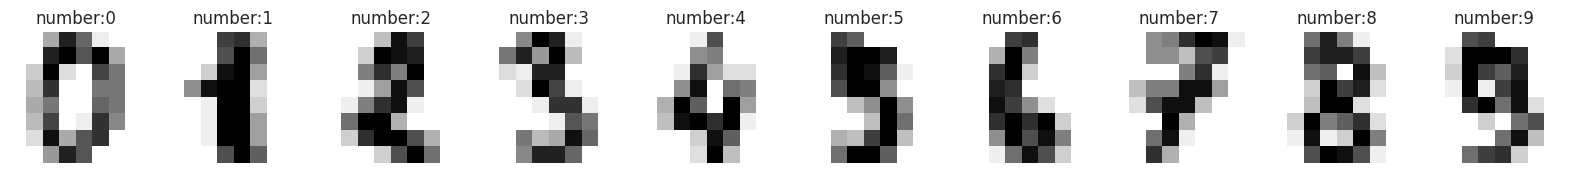

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()
plt.figure(figsize=(20, 5))
for label, img in zip(digits.target[:10], digits.images[:10]):
    plt.subplot(1, 10, label+1)
    plt.axis("off")
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation="nearest")
    plt.title(f"number:{label}")

In [21]:
digits.data.shape
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [20]:
digits.target.shape
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [22]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, stratify=digits.target, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1347, 64) (450, 64) (1347,) (450,)


In [23]:
model = LinearSVC(random_state=0)
model.fit(x_train, y_train)
print(f"train score:{model.score(x_train, y_train)}")
print(f"test score:{model.score(x_test, y_test)}")

train score:0.9792130660727543
test score:0.9333333333333333


/home/horino/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [26]:
y_pred = model.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[44,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 39,  2,  0,  0,  1,  0,  0,  4,  0],
       [ 0,  1, 42,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 45,  0,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 42,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  1,  0, 44,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 44,  0,  1,  0],
       [ 0,  0,  0,  2,  0,  0,  0, 41,  0,  2],
       [ 0,  1,  0,  2,  0,  0,  0,  0, 40,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  3, 39]])

In [31]:
pd.DataFrame(y_train, columns=["label"]).groupby("label")["label"].count()

label
0    133
1    136
2    133
3    137
4    136
5    136
6    136
7    134
8    131
9    135
Name: label, dtype: int64

In [32]:
pd.DataFrame(y_test, columns=["label"]).groupby("label")["label"].count()

label
0    45
1    46
2    44
3    46
4    45
5    46
6    45
7    45
8    43
9    45
Name: label, dtype: int64

In [39]:
for model in [LogisticRegression(), LinearSVC(), DecisionTreeClassifier(), KNeighborsClassifier(n_neighbors=2), RandomForestClassifier()]:
    fitted_model = model.fit(x_train, y_train)
    pred_y = fitted_model.predict(x_test)
    conf_m = confusion_matrix(y_test, pred_y)
    print('confusion_matrix:')
    print(conf_m)
    print('train:',fitted_model.__class__.__name__ ,fitted_model.score(x_train,y_train))
    print('test:',fitted_model.__class__.__name__ , fitted_model.score(x_test,y_test))
    print('===============================================================\n')

/home/horino/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/horino/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


confusion_matrix:
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0  0  1  0]
 [ 0  1 43  0  0  0  0  0  0  0]
 [ 0  0  0 46  0  0  0  0  0  0]
 [ 0  1  0  0 43  0  0  0  1  0]
 [ 0  1  0  1  0 43  0  1  0  0]
 [ 0  1  0  0  0  0 44  0  0  0]
 [ 0  0  0  1  0  0  0 42  0  2]
 [ 0  4  0  0  0  0  1  0 37  1]
 [ 0  0  0  1  0  1  0  0  0 43]]
train: LogisticRegression 1.0
test: LogisticRegression 0.9577777777777777

confusion_matrix:
[[44  0  0  0  1  0  0  0  0  0]
 [ 0 44  0  0  0  1  0  0  1  0]
 [ 0  3 40  1  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  1  0]
 [ 0  3  0  0 41  0  0  0  1  0]
 [ 0  0  0  0  0 45  0  1  0  0]
 [ 0  1  0  0  0  0 44  0  0  0]
 [ 0  1  0  1  0  0  0 41  0  2]
 [ 0  4  0  2  0  0  0  0 37  0]
 [ 0  1  0  1  0  1  0  1  2 39]]
train: LinearSVC 0.9955456570155902
test: LinearSVC 0.9333333333333333

confusion_matrix:
[[43  0  0  0  0  0  1  0  0  1]
 [ 0 37  3  2  2  0  0  0  2  0]
 [ 0  0 38  2  1  0  1  1  1  0]
 [ 0  1  0 38  0  0  0  1  6  0]
 [ 0 

In [40]:
# データの読み込み
abalone_data = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',
    header=None,
    sep=',')

# 列にラベルの設定
abalone_data.columns=['Sex','Length','Diameter','Height','Whole','Shucked','Viscera','Shell','Rings']

# 先頭5行を表示
abalone_data.head()

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


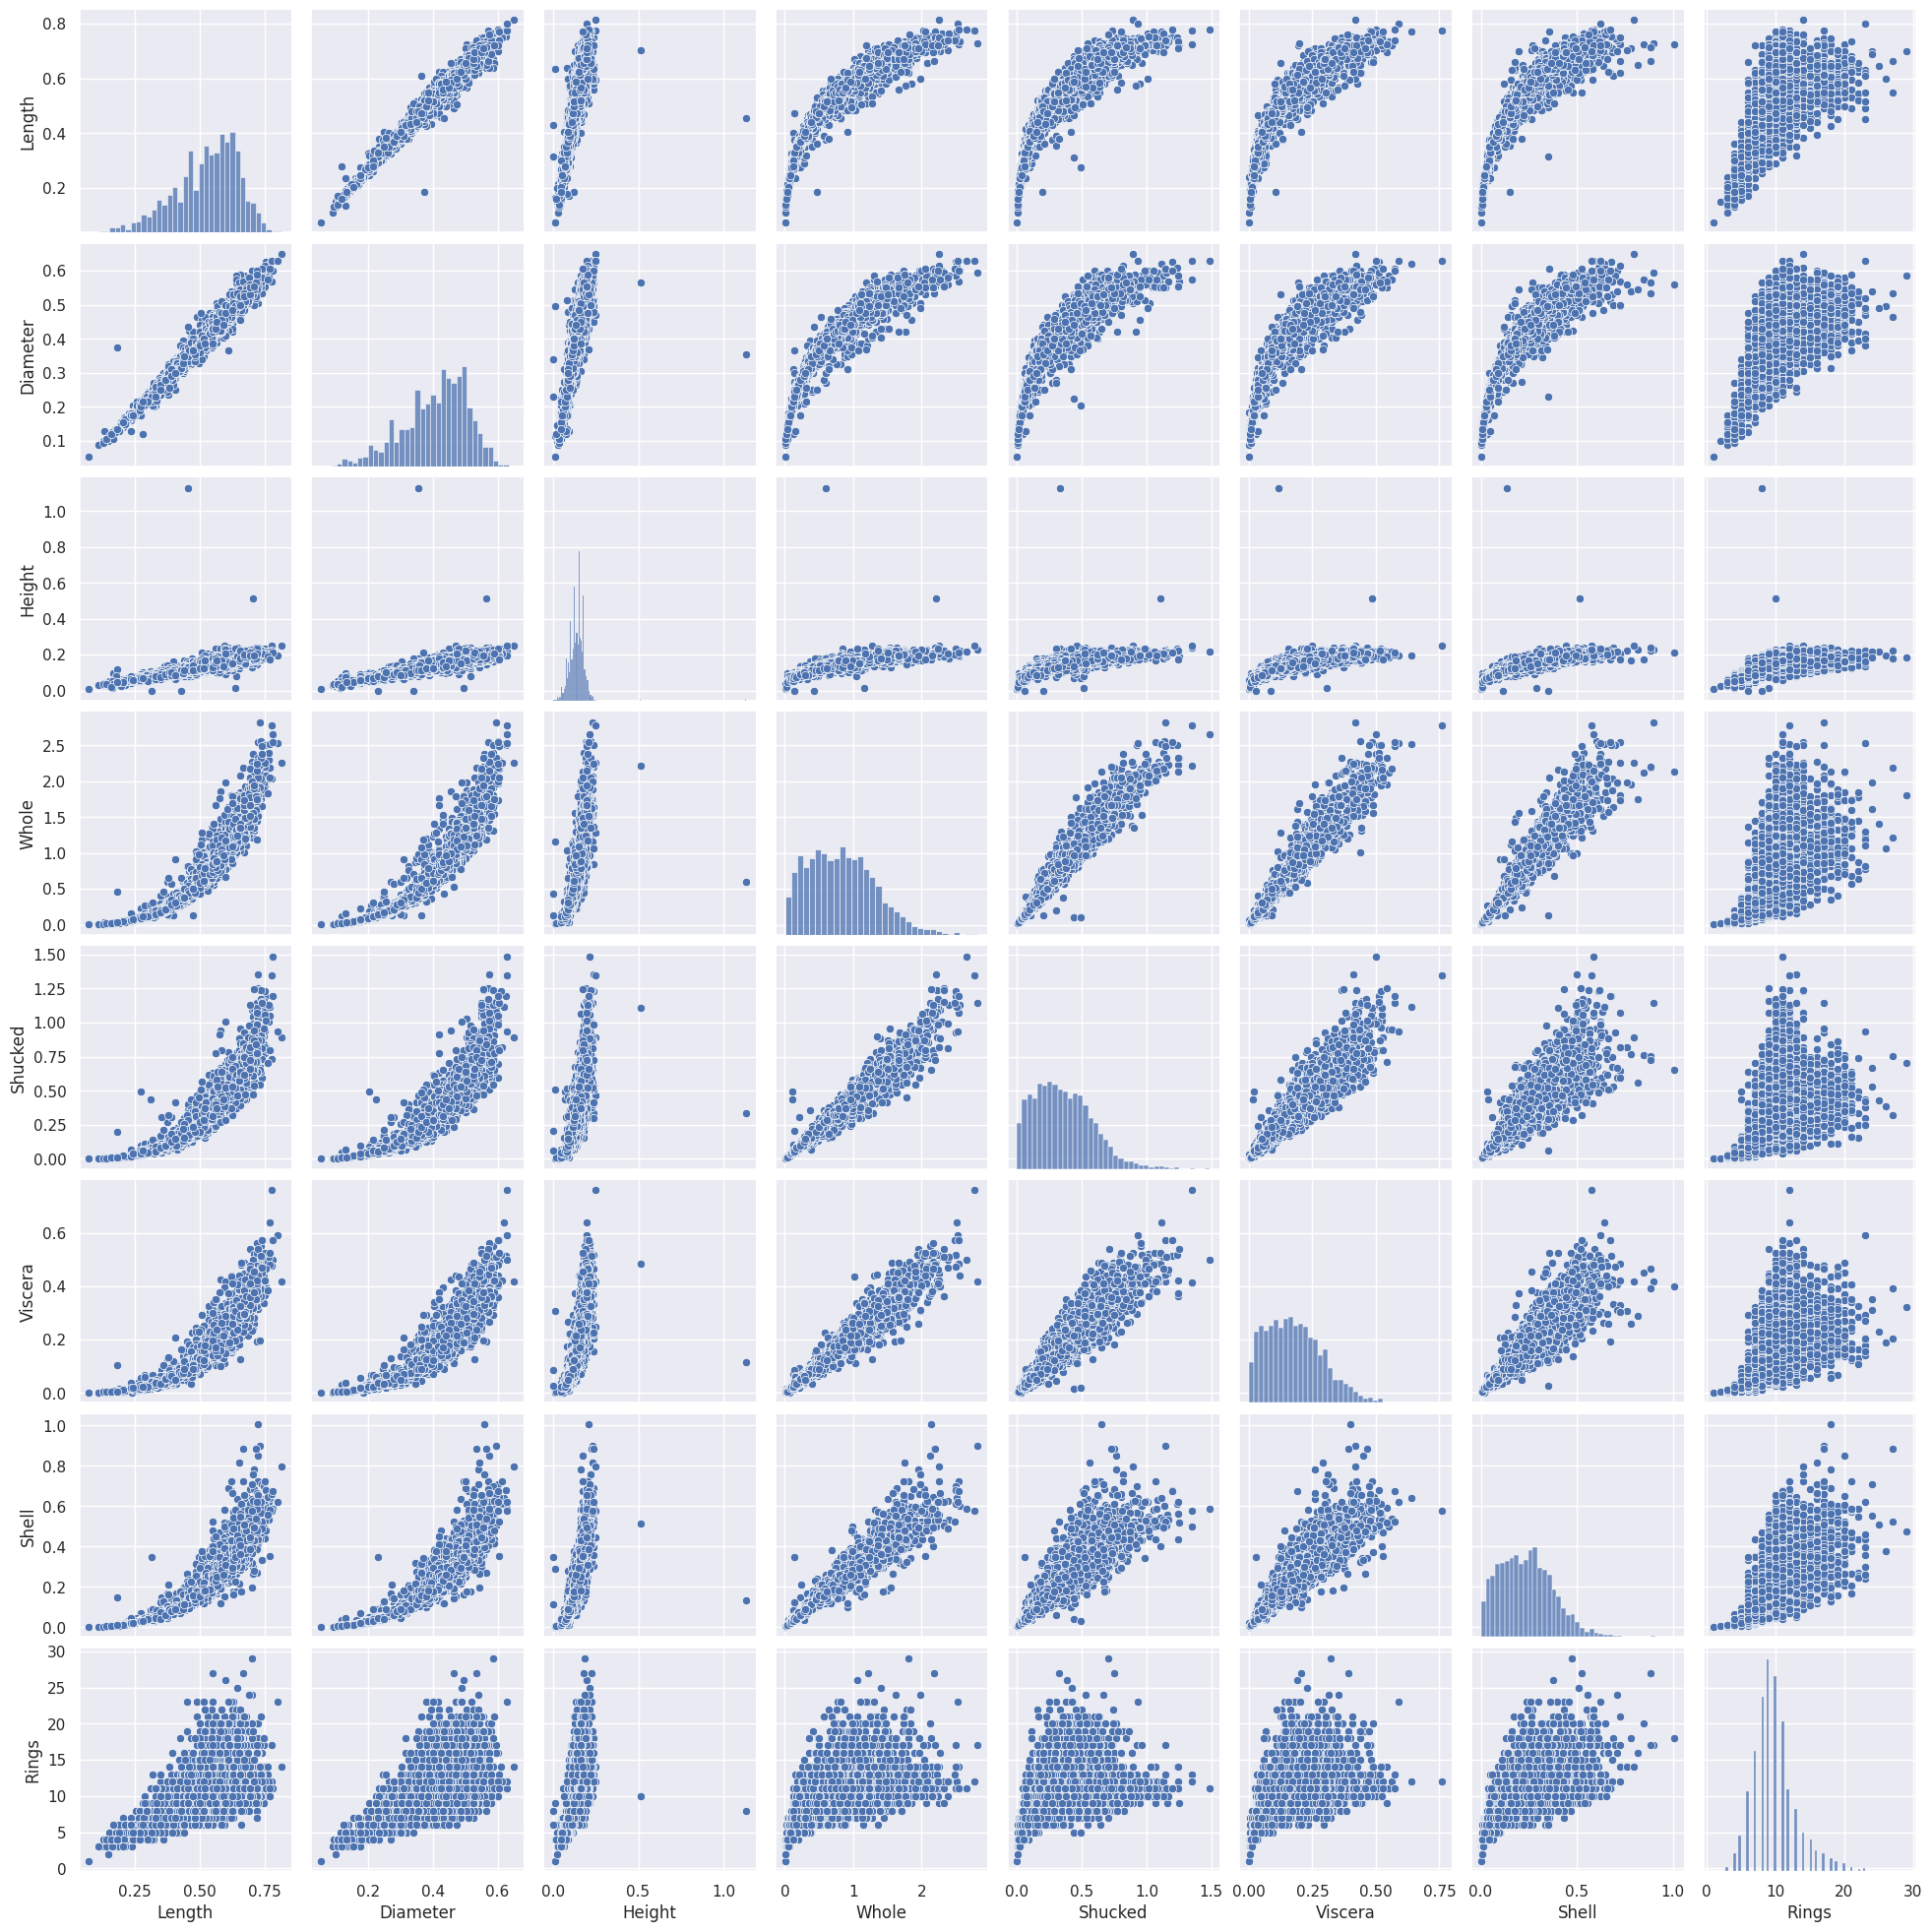

In [45]:
sns.pairplot(abalone_data)

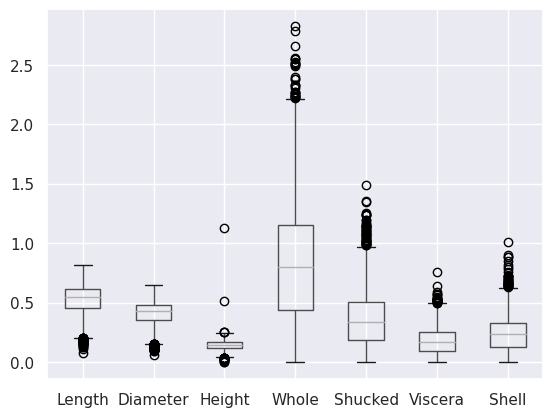

In [47]:
abalone_data[['Length','Diameter','Height','Whole','Shucked','Viscera','Shell']].boxplot()
plt.grid(True)

In [48]:
abalone_data.describe()

,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [49]:
# 線形回帰モデル
from sklearn.linear_model import LinearRegression
# 決定木(回帰)
from sklearn.tree import  DecisionTreeRegressor
# k-NN
from sklearn.neighbors import  KNeighborsRegressor
# ランダムフォレスト
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

In [53]:
x = abalone_data.iloc[:, 1:7]
x

,Length,Diameter,Height,Whole,Shucked,Viscera
0,0.455,0.365,0.095,0.5140,0.2245,0.1010
1,0.350,0.265,0.090,0.2255,0.0995,0.0485
2,0.530,0.420,0.135,0.6770,0.2565,0.1415
3,0.440,0.365,0.125,0.5160,0.2155,0.1140
4,0.330,0.255,0.080,0.2050,0.0895,0.0395
...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610


In [58]:
y = abalone_data["Rings"]
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [64]:
for model in [LinearRegression(), DecisionTreeClassifier(), KNeighborsClassifier(n_neighbors=5), RandomForestClassifier()]:
    fit_model = model.fit(x_train_std, y_train)
    print('train:',fit_model.__class__.__name__ ,fit_model.score(x_train_std, y_train))
    print('test:',fit_model.__class__.__name__ , fit_model.score(x_test_std, y_test))

train: LinearRegression 0.5170692142555524
test: LinearRegression 0.5306021117203747
train: DecisionTreeClassifier 1.0
test: DecisionTreeClassifier 0.18660287081339713
train: KNeighborsClassifier 0.44284802043422733
test: KNeighborsClassifier 0.22775119617224882
train: RandomForestClassifier 1.0
test: RandomForestClassifier 0.24114832535885167


In [65]:
from sklearn.neighbors import  KNeighborsRegressor

from sklearn.model_selection import train_test_split

X = abalone_data.iloc[:,1:7]
Y = abalone_data['Rings']

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, random_state=0)

# 標準化のためのモジュール
from sklearn.preprocessing import StandardScaler

# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

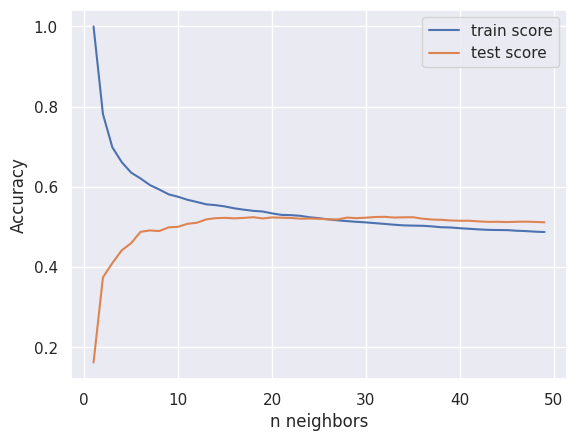

In [67]:
train_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 50)

for n in neighbors_settings:
    clf = KNeighborsRegressor(n_neighbors=n)
    clf.fit(x_train_std, y_train)
    train_accuracy.append(clf.score(x_train_std, y_train))
    test_accuracy.append(clf.score(x_test_std, y_test))
    
plt.plot(neighbors_settings, train_accuracy, label="train score")
plt.plot(neighbors_settings, test_accuracy, label="test score")
plt.ylabel("Accuracy")
plt.xlabel("n neighbors")
plt.legend()

In [68]:
import io
import zipfile
import requests

# データがあるurl の指定
zip_file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'
r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [70]:
banking_c_data = pd.read_csv("bank-full.csv", sep=";")
banking_c_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [71]:
banking_c_data_dummy = pd.get_dummies(banking_c_data[['job','marital','education','default','housing','loan']])
banking_c_data_dummy.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,1,0


In [72]:
banking_c_data_dummy["flg"] = banking_c_data["y"].map(lambda x: 1 if x == "yes" else 0)

In [73]:
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
# SVM
from sklearn.svm import LinearSVC
# 決定木
from sklearn.tree import  DecisionTreeClassifier
# k-NN
from sklearn.neighbors import  KNeighborsClassifier
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier

# データの分割（学習データとテストデータ分ける）
from sklearn.model_selection import train_test_split

# 混同行列、その他の指標
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score


In [77]:
x = pd.concat([banking_c_data_dummy.drop("flg", axis=1), banking_c_data[["age", "balance", "campaign"]]], axis=1)
y = banking_c_data_dummy["flg"]
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: flg, Length: 45211, dtype: int64

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=0)

In [83]:
for model in [LogisticRegression(),LinearSVC(), 
              DecisionTreeClassifier(),
              KNeighborsClassifier(n_neighbors=5),
              RandomForestClassifier()]:
    fit_model = model.fit(x_train, y_train)
    y_pred = fit_model.predict(x_test)
    confusion_m = confusion_matrix(y_test, y_pred)
    print('train:',fit_model.__class__.__name__ ,fit_model.score(x_train,y_train))
    print('test:',fit_model.__class__.__name__ , fit_model.score(x_test,y_test))
    print('Confution matrix:\n{}'.format(confusion_m))
    print('適合率:%.3f' % precision_score(y_true=y_test,y_pred=y_pred))
    print('再現率:%.3f' % recall_score(y_true=y_test,y_pred=y_pred))
    print('F1値:%.3f' % f1_score(y_true=y_test,y_pred=y_pred))

/home/horino/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train: LogisticRegression 0.8828889937477882
test: LogisticRegression 0.8830399009112625
Confution matrix:
[[9980    1]
 [1321    1]]
適合率:0.500
再現率:0.001
F1値:0.002


/home/horino/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


train: LinearSVC 0.882977468444025
test: LinearSVC 0.883128372998319
Confution matrix:
[[9981    0]
 [1321    1]]
適合率:1.000
再現率:0.001
F1値:0.002
train: DecisionTreeClassifier 0.9943966025716645
test: DecisionTreeClassifier 0.8136777846589401
Confution matrix:
[[8820 1161]
 [ 945  377]]
適合率:0.245
再現率:0.285
F1値:0.264
train: KNeighborsClassifier 0.898018166804294
test: KNeighborsClassifier 0.8692382553304433
Confution matrix:
[[9693  288]
 [1190  132]]
適合率:0.314
再現率:0.100
F1値:0.152
train: RandomForestClassifier 0.9943671110062522
test: RandomForestClassifier 0.8766699106431921
Confution matrix:
[[9651  330]
 [1064  258]]
適合率:0.439
再現率:0.195
F1値:0.270


In [84]:
from sklearn.metrics import roc_curve,roc_auc_score

for model in [DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=5)
             ,RandomForestClassifier()]:
    fit_model = model.fit(x_train, y_train)
    method = fit_model.__class__.__name__
    

In [89]:
from sklearn.preprocessing import StandardScaler

# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

In [90]:
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [91]:
model = LogisticRegression()
fit_model = model.fit(x_train_std, y_train)
print(fit_model.score(x_train_std, y_train))
print(fit_model.score(x_test_std, y_test))

0.9906103286384976
0.958041958041958


In [92]:
# インポート
from sklearn.cluster import KMeans

In [94]:
kmeans_pp = KMeans(n_clusters=5)
kmeans_pp.fit(x_train_std)
y_train_cl = kmeans_pp.fit_predict(x_train_std)
y_test_cl = kmeans_pp.fit_predict(x_test_std)

In [96]:
cl_train_data = pd.DataFrame(y_train_cl, columns=["cl_nm"]).astype(str)
cl_train_data_dummy = pd.get_dummies(cl_train_data)
cl_train_data_dummy.head()

,cl_nm_0,cl_nm_1,cl_nm_2,cl_nm_3,cl_nm_4
0,1,0,0,0,0
1,0,0,0,1,0
2,1,0,0,0,0
3,0,1,0,0,0
4,1,0,0,0,0


In [97]:
cl_test_data = pd.DataFrame(y_test_cl, columns=["cl_nm"]).astype(str)
cl_test_data_dummy = pd.get_dummies(cl_test_data)
cl_test_data_dummy.head()

,cl_nm_0,cl_nm_1,cl_nm_2,cl_nm_3,cl_nm_4
0,0,1,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,1,0,0,0,0


In [99]:
merge_train_data = pd.concat([pd.DataFrame(x_train_std), cl_train_data_dummy, pd.DataFrame(y_train, columns=["flg"])], axis=1)
merge_train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,cl_nm_0,cl_nm_1,cl_nm_2,cl_nm_3,cl_nm_4,flg
0,-0.500746,-0.629604,-0.510598,-0.508655,-0.326770,-0.678037,-0.702917,-0.673290,-0.323201,-0.513532,...,-0.494471,-0.429224,-0.465020,-0.447715,1,0,0,0,0,1
1,0.948356,0.011070,0.931367,0.814498,-0.473158,0.297845,0.191520,0.649428,-1.114571,-1.117685,...,0.387699,1.175397,0.053685,-0.302163,0,0,0,1,0,0
2,-1.005023,-0.151387,-1.005709,-0.884654,0.755356,-0.706644,-0.840513,-0.798055,-1.203323,0.466252,...,-0.915127,-0.748055,-1.142683,-0.316267,1,0,0,0,0,1
3,-1.634260,0.326831,-1.551415,-1.243587,-0.159571,0.500562,0.556308,-0.699663,1.533191,2.838587,...,1.303103,-0.546019,0.712943,3.642956,0,1,0,0,0,1
4,-0.254149,-0.789772,-0.314642,-0.325885,-0.801097,-0.976997,-1.115819,-1.166748,-0.648624,-0.542097,...,-1.272052,-1.350424,-0.409803,-0.009932,1,0,0,0,0,1


In [100]:
merge_test_data = pd.concat([pd.DataFrame(x_test_std), cl_test_data_dummy, pd.DataFrame(y_test, columns=["flg"])], axis=1)
merge_test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,cl_nm_0,cl_nm_1,cl_nm_2,cl_nm_3,cl_nm_4,flg
0,-0.121153,-0.673078,-0.166470,-0.220737,-0.251423,-0.597329,-0.910270,-0.772696,-0.652322,-0.169322,...,-0.737374,-0.422644,-0.150450,-0.350116,0,1,0,0,0,1
1,1.599483,0.226153,1.549754,1.536769,0.532903,0.510035,0.671505,1.142150,-0.019966,-0.122190,...,0.718574,0.687879,-0.580474,0.413746,1,0,0,0,0,0
2,1.078582,0.294797,1.063879,0.966990,0.274571,0.470249,0.363034,0.718911,1.141204,-0.280726,...,-0.083444,0.502443,0.594143,-0.438688,1,0,0,0,0,0
3,-1.208673,2.042922,-1.213712,-1.004115,-1.179267,-1.095406,-0.937278,-0.984950,-0.689302,-0.459258,...,-0.975388,-0.996599,-0.961973,-0.672248,0,1,0,0,0,1
4,1.056416,1.191741,0.935383,0.944694,-0.554246,-0.640525,-0.405070,-0.046419,-0.996235,-1.090548,...,-0.310217,-0.025452,-0.655770,-0.256467,1,0,0,0,0,0


In [102]:
model = LogisticRegression()
x_train_data = merge_train_data.drop("flg", axis=1)
x_test_data = merge_test_data.drop("flg", axis=1)
y_train_data = merge_train_data["flg"]
y_test_data = merge_test_data["flg"]

In [103]:
from sklearn.decomposition import PCA

In [104]:
best_score = 0
best_num = 0

In [105]:
for num_com in range(8):
    pca = PCA(n_components=num_com+1)
    pca.fit(x_train_data)
    x_train_pca = pca.transform(x_train_data)
    x_test_pca = pca.transform(x_test_data)
    
    logistic_model = model.fit(x_train_pca, y_train_data)
    
    train_score = logistic_model.score(x_train_pca, y_train_data)
    test_score = logistic_model.score(x_test_pca, y_test_data)
    
    if best_score < test_score:
        best_score = test_score
        best_num = num_com
        
print(best_score, best_num)

0.972027972027972 7


/home/horino/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/horino/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/horino/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/horino/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', '

In [106]:
import pandas_datareader.data as pdr

start_date = '2001-01-02'
end_date = '2016-12-30'

fx_jpusdata = pdr.DataReader('DEXJPUS','fred',start_date,end_date)
fx_useudata = pdr.DataReader('DEXUSEU','fred',start_date,end_date)

In [107]:
fx_jpusdata_full = fx_jpusdata.fillna(method="ffill")
fx_useudata_full = fx_useudata.fillna(method="ffill")

In [108]:
fx_jpusdata_full.describe()

,DEXJPUS
count,4174.000000
mean,105.775220
std,14.612526
min,75.720000
25%,95.365000
50%,108.105000
75%,118.195000
max,134.770000


In [109]:
fx_useudata_full.describe()

,DEXUSEU
count,4174.000000
mean,1.239633
std,0.165265
min,0.837000
25%,1.128100
50%,1.274700
75%,1.352575
max,1.601000


<AxesSubplot:xlabel='DATE'>

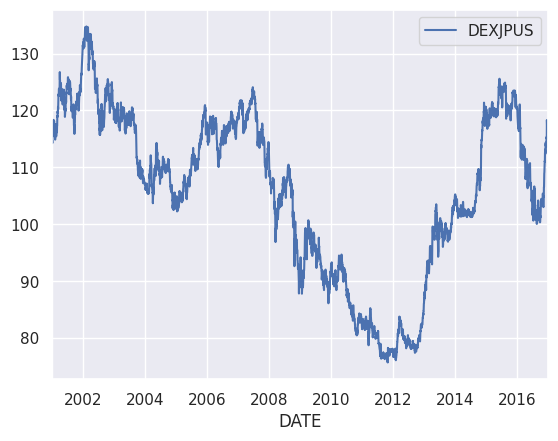

In [110]:
fx_jpusdata_full.plot()

<AxesSubplot:xlabel='DATE'>

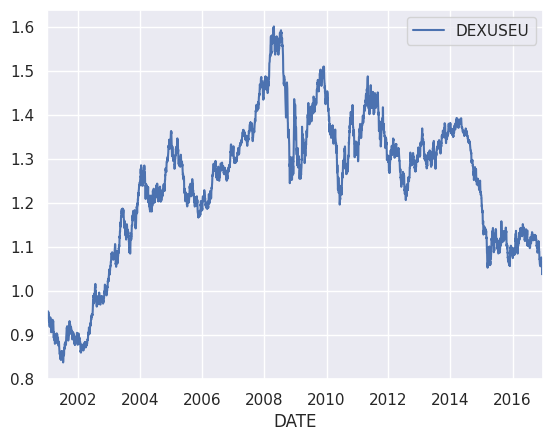

In [112]:
fx_useudata_full.plot()

In [113]:
fx_jpusdata_full_r = (fx_jpusdata_full - fx_jpusdata_full.shift(1)) / fx_jpusdata_full.shift(1)
fx_useudata_full_r = (fx_useudata_full - fx_useudata_full.shift(1)) / fx_useudata_full.shift(1)

array([[<AxesSubplot:title={'center':'DEXUSEU'}>]], dtype=object)

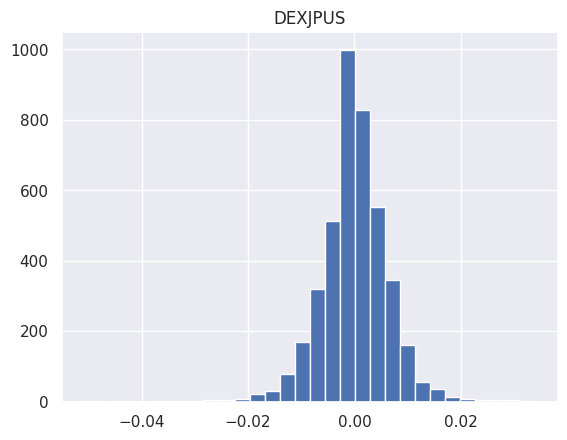

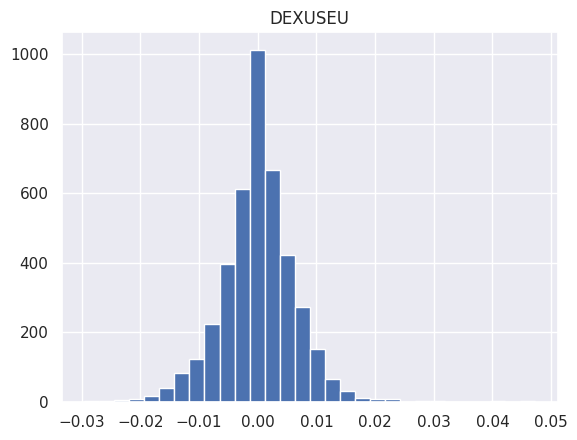

In [114]:
fx_jpusdata_full_r.hist(bins=30)
fx_useudata_full_r.hist(bins=30)